Restrictions via algorithm (fmin_l_bfgs_b)
=================================================

Free parameter names and their order:  ['A', 'mu', 'sig', 'off']
------------------- Parameter summary --------------------
      A =           -2, free: T, restricted: F, related: F
     mu =      9.88661, free: T, restricted: F, related: F
    sig =     -6.14987, free: T, restricted: F, related: F
    off =     0.970353, free: T, restricted: F, related: F
    lin =            0, free: F, restricted: F, related: F
----------------------------------------------------------


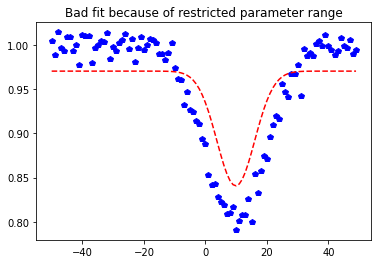

In [1]:
from __future__ import print_function, division
from numpy import arange, sqrt, exp, pi, random, ones_like
import matplotlib.pylab as plt
from PyAstronomy import funcFit2 as fuf2
import scipy.optimize as sco

random.seed(1234)

# Creating a Gaussian with some noise
# Choose some parameters...
gPar = {"A":-5.0, "sig":10.0, "mu":10.0, "off":1.0, "lin":0.0}
# Calculate profile
x = arange(100) - 50.0
y = gPar["off"] + gPar["A"] / sqrt(2*pi*gPar["sig"]**2) \
    * exp(-(x-gPar["mu"])**2/(2*gPar["sig"]**2))
# Add some noise...
y += random.normal(0.0, 0.01, x.size)
# ...and save the error bars
yerr = ones_like(x)*0.01
# Let us see what we have done...
plt.plot(x, y, 'bp')

# Create a model object
gf = fuf2.GaussFit()

# Set guess values for the parameters
gf.assignValues({"A":-3, "sig":10.77, "off":0.96, "mu":10.5})

# 'Thaw' those (the order is irrelevant)
gf.thaw(["mu", "sig", "off", "A"])

# We need the order to get the order of bounds right
# This is not necessarily the order in which they are thawed!
print("Free parameter names and their order: ", gf.freeParamNames())

# Use fmin_l_bfgs_b with area restricted to the (-2,0) interval
fr = sco.fmin_l_bfgs_b(gf.objf, gf.freeParamVals(), args=(x,y,yerr), \
                       bounds=((-2.,0), (None,None), (None,None), (None,None)), \
                       approx_grad=True)
# Set the parameter values to best-fit
gf.setFreeParamVals(fr[0])

gf.parameterSummary()
plt.title("Bad fit because of restricted parameter range")
plt.plot(x, gf.evaluate(x), 'r--')
plt.show()